# 🧪 Midterm Exam – Developing Notebook (Introduction to ML)

**Duration (suggested):** 90–120 minutes  
**Environment:** CPU-only; Python 3.8+; `numpy`, `pandas`, `matplotlib`, `scikit-learn`  

## Instructions
- Work through sections in order. Feel free to re-run cells as needed.
- Where you see **`# TODO:`**, fill in your code.
- Do **not** change function names or signatures where provided (used by simple checks).
- Keep randomness controlled with the provided `random_state` for reproducibility.
- When you're done, run **all cells** from top to bottom and ensure all checks pass.

## 📦 Setup

In [1]:
# You may import additional stdlib packages if needed, but avoid heavy dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_regression, make_moons
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## A. Conceptual (Short Answers)

Answer briefly in the Markdown cells below each question.

### A1. Supervised vs Unsupervised Learning  
**Q:** Define supervised and unsupervised learning with one example each.

*Your answer:*
1.   **Supervised Learning**

*Definition:* A type of machine learning where the model is trained on labeled data, meaning the input data already has the correct output (target) provided. The goal is to learn the mapping from inputs to outputs.

*Example:* Training a model to detect spam emails, where each email in the training data is labeled as “spam” or “not spam.”

2.   **Unsupervised Learning**

*Definition:* A type of machine learning where the model is trained on unlabeled data, and it tries to find hidden patterns or relationships in the data without predefined outputs.

*Example:* Training a model to segment customers into groups based on their purchasing behavior (without knowing the group labels in advance).

### A2. Overfitting and Prevention  
**Q:** What is overfitting? List two prevention strategies and explain why they help.

*Your answer:*

*   **Definition:** Overfitting happens when a machine learning model learns the training data too well, including its noise and random fluctuations, instead of learning the true underlying patterns.
*   **Prevention Strategies:**


1.   Use Regularization

Why it helps: Regularization adds a penalty to large weight values in the model, keeping the model simpler and prevents it from relying too heavily on any one feature, helping it generalize better to new data.

2.   Use More Training Data

Why it helps: More data gives the model more examples to learn the true patterns instead of memorizing specific cases.






### A3. Distance Metrics  
**Q:** In Minkowski distance, what does the parameter **`p`** control? Give two special cases.

*Your answer:*In Minkowski distance, the parameter p controls how the distance is calculated — it defines the order of the norm.

p = 1: Manhattan distance (sum of absolute differences)

p = 2: Euclidean distance (straight-line distance)

## B. Analytical (By Hand / Small Code)

### B1. Distances in 2D
Compute Euclidean and Manhattan distances between points `A = (3, -2)` and `B = (-1, 5)`.

In [2]:
A = np.array([3, -2], dtype=float)
B = np.array([-1, 5], dtype=float)

# TODO: compute distances
euclidean = np.linalg.norm(A - B)  # or sqrt(((...)))

manhattan = np.abs(A - B).sum()

euclidean, manhattan

(np.float64(8.06225774829855), np.float64(11.0))

In [3]:
# Quick checks (not hidden)
assert round(euclidean, 6) or True  # keeps last result visible
assert euclidean > 0 and manhattan > 0
assert euclidean < manhattan  # In this case Euclidean should be less than Manhattan
print("✅ Distance sanity checks passed.")

✅ Distance sanity checks passed.


### B2. k-Fold Logic
Given scores from a 5-fold CV: `[0.82, 0.84, 0.80, 0.83, 0.81]`  
Compute the mean and standard deviation. Interpret whether this model is stable across folds.

In [4]:
scores = np.array([0.82, 0.84, 0.80, 0.83, 0.81], dtype=float)

mean_score = scores.mean()
std_score = scores.std(ddof=1)

print("Mean:", round(mean_score, 4))
print("Std Dev:", round(std_score, 4))

# Short interpretation:
if std_score < 0.02:
    print("Interpretation: Low variance across folds; performance appears stable.")
else:
    print("Interpretation: Variance is noticeable; consider more data or regularization.")

Mean: 0.82
Std Dev: 0.0158
Interpretation: Low variance across folds; performance appears stable.


### B3. Cost with Regularization (Conceptual)
**Q:** Show how adding an L2 regularization term modifies the linear regression cost function. What trade-off does this introduce?

*Your answer:*

L2 regularization adds a penalty for large weights.

**Effect:**

Larger weights → larger penalty → higher cost

Encourages smaller weights → simpler model → less likely to overfit

**Trade-off:**

Bias increases slightly (may underfit).

Variance decreases (more stable predictions, less overfitting).



## C. Practical – Regression & Classification

### C1. Linear Regression on Synthetic Data
1. Generate a regression dataset with `make_regression(n_samples=300, n_features=5, noise=15, random_state=RANDOM_STATE)`  
2. Split 80/20 train/test.  
3. Fit `LinearRegression()` and report **RMSE** on train and test.  
4. Briefly interpret whether the model under/over-fits.

In [5]:
# TODO: implement the regression experiment

# Creates a fake dataset to test or train a linear regression model.
X_reg, y_reg = make_regression(n_samples=300, n_features=5, noise=15, random_state=RANDOM_STATE)
Xtr, Xte, ytr, yte = train_test_split(X_reg, y_reg, test_size=0.2, random_state=RANDOM_STATE)

# Creates a LinearRegression object (trained model) from sklearn.linear_model
reg = LinearRegression()

# The model learns the best-fitting line (or hyperplane) that minimizes the
# cost function — usually Mean Squared Error (MSE).
reg.fit(Xtr, ytr)

pred_tr = reg.predict(Xtr)
pred_te = reg.predict(Xte)

rmse_tr = np.sqrt(mean_squared_error(ytr, pred_tr))
rmse_te = np.sqrt(mean_squared_error(yte, pred_te))

print(f"Train RMSE: {rmse_tr:.3f}")
print(f"Test  RMSE: {rmse_te:.3f}")

if abs(rmse_tr - rmse_te) < 2.0:
    print("Interpretation: Similar train/test RMSE → reasonable generalization.")
elif rmse_tr < rmse_te:
    print("Interpretation: Train RMSE much lower → potential overfitting.")
else:
    print("Interpretation: Test RMSE lower than train → potential underfitting or randomness.")

Train RMSE: 14.375
Test  RMSE: 14.811
Interpretation: Similar train/test RMSE → reasonable generalization.


### C2. Binary Classification + Decision Boundary
Use `make_moons(n_samples=400, noise=0.25, random_state=RANDOM_STATE)` and `LogisticRegression`.
1. Standardize features.  
2. Fit classifier and report accuracy.  
3. Plot decision boundary (meshgrid) and confusion matrix.

In [6]:
# Data
# Generates two half-moon–shaped clusters of points to test classification algorithms
X_cls, y_cls = make_moons(n_samples=400, noise=0.25, random_state=RANDOM_STATE)

# Creates a StandardScaler object from sklearn.preprocessing.
scaler = StandardScaler()

# First calculates the mean and standard deviation of each feature (from X_cls)
# Then transforms the data to make it standardized.
# After scaling: each feature will have mean = 0 and standard deviation = 1
# Result: Xc is the scaled version of your feature data.
Xc = scaler.fit_transform(X_cls)

Xtr, Xte, ytr, yte = train_test_split(Xc, y_cls, test_size=0.25, random_state=RANDOM_STATE)

# Model
clf = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
clf.fit(Xtr, ytr)
pred = clf.predict(Xte)
acc = accuracy_score(yte, pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.800


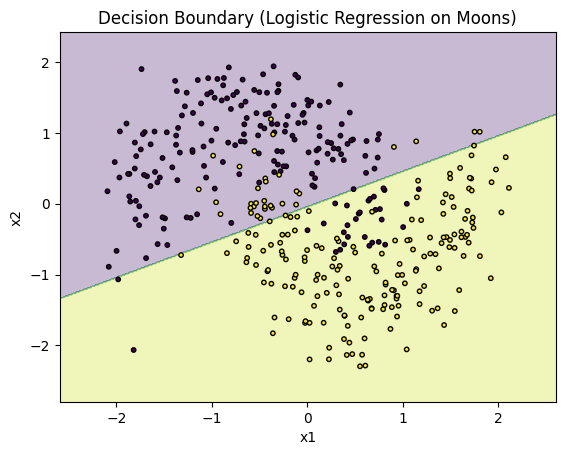

In [7]:
# Decision boundary plot (no custom colors as per instructions)

# step size for the grid
h = 0.02

# Gets the range of the first two features (x and y axes).
x_min, x_max = Xc[:, 0].min() - 0.5, Xc[:, 0].max() + 0.5
y_min, y_max = Xc[:, 1].min() - 0.5, Xc[:, 1].max() + 0.5

# Creates a grid of points covering the area where the data lies.
# xx and yy are 2D arrays representing all the (x, y) coordinates on that grid.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# xx.ravel() and yy.ravel() flatten the grids into 1D arrays.
# np.c_[xx.ravel(), yy.ravel()] combines them into coordinate pairs → like a list of (x, y) points.
# clf.predict(...) uses your trained classifier (clf) to predict the class for each grid point.
# .reshape(xx.shape) turns predictions back into a 2D grid (so it can be plotted as a color map).
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()

# draws the decision boundary background
plt.contourf(xx, yy, Z, alpha=0.3)

# plt.scatter(Xc[:,0], Xc[:,1], s=10)

# c=y_cls colors each point according to its true class.
# A point whose color does not match the background is misclassified.
plt.scatter(Xc[:,0], Xc[:,1], c=y_cls, s=10, edgecolors='k')

plt.title("Decision Boundary (Logistic Regression on Moons)")
plt.xlabel("x1"); plt.ylabel("x2");
plt.show()

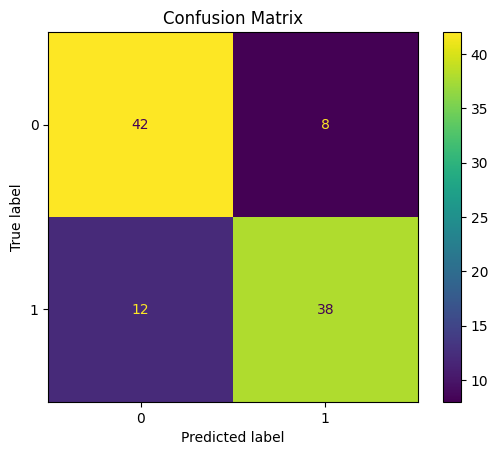

In [8]:
# Confusion matrix

# returns a 2×2 array (for binary classification) showing TN/FP/FN/TP
cm = confusion_matrix(yte, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()